## Importing Libraries

In [1]:
from bci_utils import *

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


## Hyperparameters

In [2]:
# Set hyperparameters
CV_splits = 1
test_size = 0.2
random_state = 32
# num_layers = 2
# batch_size = 32
# n_epochs = 50
# Using same hyperparameters across models to compare performance

In [3]:
data_path = "../Data/BCICIV_2a_gdf/"

## Sample data

In [ ]:
raw = mne.io.read_raw_gdf(data_path + "A01T.gdf")

print(raw.info)
print(raw.ch_names)

Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<Info | 8 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


In [ ]:
# Find the events time positions
events, _ = mne.events_from_annotations(raw)

# Pre-load the data
raw.load_data()

# Filter the raw signal with a band pass filter in 7-35 Hz
raw.filter(7., 35., fir_design='firwin')

# Remove the EOG channels and pick only desired EEG channels
raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')

# Extracts epochs of 3s time period from the datset into 288 events for all 4 classes
tmin, tmax = 1., 4.
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772
event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


0 bad epochs dropped


<Evoked | '769' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


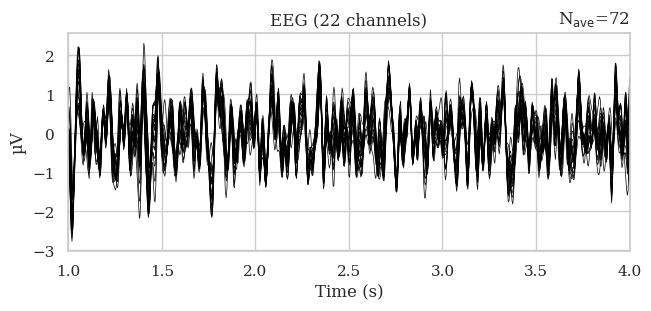

<Evoked | '770' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


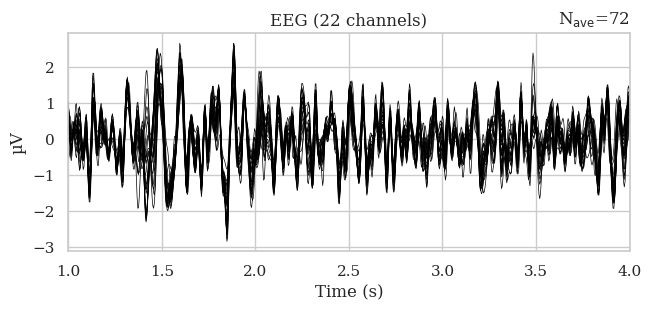

<Evoked | '771' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


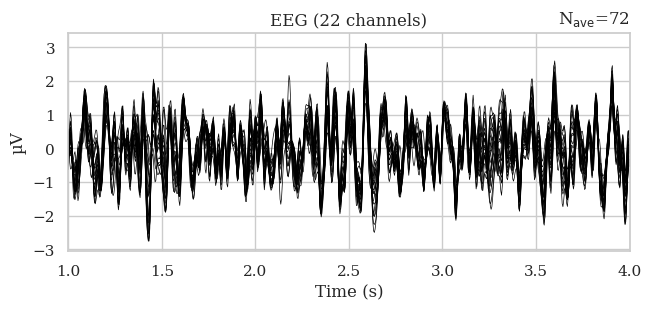

<Evoked | '772' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


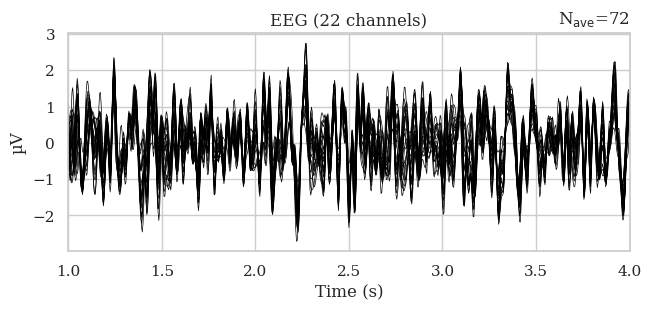

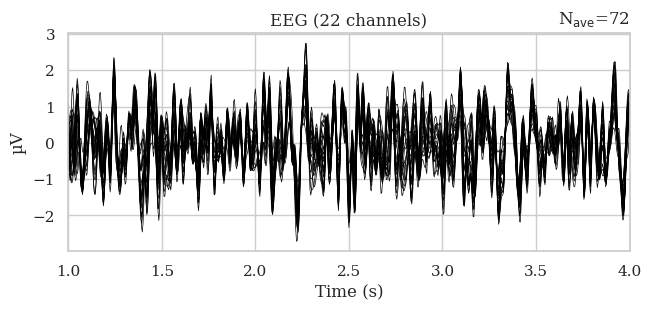

In [ ]:
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772

# Left hand epoch average plot
evoked = epochs['769'].average()
print(evoked)
evoked.plot(time_unit='s')

# Right hand epoch average plot
evoked = epochs['770'].average()
print(evoked)
evoked.plot(time_unit='s')

# Foot epoch average plot
evoked = epochs['771'].average()
print(evoked)
evoked.plot(time_unit='s')

# Tongue epoch average plot
evoked = epochs['772'].average()
print(evoked)
evoked.plot(time_unit='s')

In [7]:
# Getting labels and changing labels from 7,8,9,10 -> 1,2,3,4
labels = epochs.events[:,-1] - 7 + 1 
data = epochs.get_data()

C:\Users\Sam\AppData\Local\Temp\ipykernel_27048\3131055463.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


In [8]:
reshaped_data = np.array(np.transpose(data, (0, 2, 1)))
reshaped_data = np.expand_dims(reshaped_data, axis=-1)

In [9]:
print(f"Data shape: {data.shape}, Reshaped Data shape: {reshaped_data.shape}, Labels shape: {labels.shape}")

Data shape: (288, 22, 751), Reshaped Data shape: (288, 751, 22, 1), Labels shape: (288,)


## Loading all Data

In [4]:
def load_file(filename):
    raw = mne.io.read_raw_gdf(data_path + filename)
    events, _ = mne.events_from_annotations(raw)
    raw.load_data()
    # raw.filter(7., 35., fir_design='firwin')
    raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
    picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                        exclude='bads')
    tmin, tmax = 0, 4.5
    # left_hand = 769,right_hand = 770,foot = 771,tongue = 772
    event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=None, preload=True, on_missing='ignore')
    labels = epochs.events[:,-1] - 7 + 1 
    data = epochs.get_data()
    return data, labels

In [5]:
os.listdir(data_path)

['A01E.gdf',
 'A01E.mat',
 'A01T.gdf',
 'A02E.gdf',
 'A02T.gdf',
 'A03E.gdf',
 'A03T.gdf',
 'A04E.gdf',
 'A04T.gdf',
 'A05E.gdf',
 'A05T.gdf',
 'A06E.gdf',
 'A06T.gdf',
 'A07E.gdf',
 'A07T.gdf',
 'A08E.gdf',
 'A08T.gdf',
 'A09E.gdf',
 'A09T.gdf',
 'true_labels',
 'true_labels.zip']

In [6]:
# train_list = []
# test_list = []
# for filename in os.listdir(data_path):
#     print(filename)
#     if filename.endswith("T.gdf"):
#         data, labels = load_file(filename)
#         # labels = scipy.io.loadmat(data_path+'true_labels/'+filename[:-3]+'mat')['classlabel']
#         train_list.append((data, labels))
#     if filename.endswith("E.gdf"):
#         data, labels = load_file(filename)
#         labels = np.squeeze(scipy.io.loadmat(data_path+'true_labels/'+filename[:-3]+'mat')['classlabel'])
#         test_list.append((data, labels))

In [7]:
train_list = []
test_list = []
i=0
for filename in os.listdir(data_path):
    print(filename)
    i+=1
    if filename.endswith("T.gdf"):
        data, labels = load_file(filename)
        # labels = scipy.io.loadmat(data_path+'true_labels/'+filename[:-3]+'mat')['classlabel']
        train_list.append((data, labels)) # All 9 subs train for train
    if filename.endswith("E.gdf"):
        data, labels = load_file(filename)
        labels = np.squeeze(scipy.io.loadmat(data_path+'true_labels/'+filename[:-3]+'mat')['classlabel'])
        if i<=12:
            train_list.append((data, labels)) 
        else:
            test_list.append((data, labels)) # Last 3 subs test for test

A01E.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A01E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Reading 0 ... 686999  =      0.000 ...  2747.996 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A01E.mat
A01T.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A02E.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A02E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Reading 0 ... 662665  =      0.000 ...  2650.660 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A02T.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A03E.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A03E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Reading 0 ... 648774  =      0.000 ...  2595.096 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A03T.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A04E.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A04E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Reading 0 ... 660046  =      0.000 ...  2640.184 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A04T.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1126 original time points ...
0 bad epochs dropped
A05E.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A05E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Reading 0 ... 679862  =      0.000 ...  2719.448 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A05T.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A06E.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A06E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Reading 0 ... 666372  =      0.000 ...  2665.488 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A06T.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A07E.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A07E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Reading 0 ... 673134  =      0.000 ...  2692.536 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A07T.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A08E.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A08E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Reading 0 ... 687791  =      0.000 ...  2751.164 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A08T.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A09E.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A09E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Reading 0 ... 675097  =      0.000 ...  2700.388 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
A09T.gdf
Extracting EDF parameters from e:\566 Project\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


c:\Users\Sam\miniconda3\envs\pytgpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
0 bad epochs dropped
true_labels
true_labels.zip


In [9]:
# train_list = []
# test_list = []
# i=0
# for filename in os.listdir(data_path):
#     print(filename)
#     i+=1
#     if filename.endswith("T.gdf"):
#         data, labels = load_file(filename)
#         # labels = scipy.io.loadmat(data_path+'true_labels/'+filename[:-3]+'mat')['classlabel']
#         if i<=14:
#             train_list.append((data, labels))
#         else:
#             test_list.append((data, labels))
#     if filename.endswith("E.gdf"):
#         data, labels = load_file(filename)
#         labels = np.squeeze(scipy.io.loadmat(data_path+'true_labels/'+filename[:-3]+'mat')['classlabel'])
#         if i<=14:
#             train_list.append((data, labels))
#         else:
#             test_list.append((data, labels))

In [8]:
# result = np.concatenate((all_data[0][0], all_data[1][0]), axis=0)
train_data = np.concatenate(([a[0] for a in train_list]), axis = 0)
train_label = np.concatenate(([a[1] for a in train_list]), axis = 0)
test_data = np.concatenate(([a[0] for a in test_list]), axis = 0)
test_label = np.concatenate(([a[1] for a in test_list]), axis = 0)

In [9]:
train_data.shape

(4176, 22, 1126)

In [10]:
test_data.shape

(864, 22, 1126)

In [11]:
print("Train class split:")
unique_elements, counts = np.unique(train_label, return_counts=True)
for value, count in zip(unique_elements, counts):
    print(f"{value}: {count}")
print("Test class split:")
unique_elements, counts = np.unique(test_label, return_counts=True)
for value, count in zip(unique_elements, counts):
    print(f"{value}: {count}")

Train class split:
1: 1080
2: 1080
3: 1008
4: 1008
Test class split:
1: 216
2: 216
3: 216
4: 216


In [12]:
X = np.expand_dims(train_data,-1)
X_TEST = np.expand_dims(test_data,-1)

In [13]:
# reshaped_data = np.array(np.transpose(train_data, (0, 2, 1)))
# # reshaped_data = np.expand_dims(reshaped_data, axis=-1)
# reshaped_test_data = np.array(np.transpose(test_data, (0, 2, 1)))
# # reshaped_test_data = np.expand_dims(reshaped_test_data, axis=-1)
# X_RESHAPED = np.expand_dims(train_data,-1)
# X_TEST_RESHAPED = np.expand_dims(test_data,-1)

In [14]:
# X_RESHAPED.shape

In [15]:
# OneHotEncoding Labels
enc = OneHotEncoder()
y_out = enc.fit_transform(train_label.reshape(-1,1)).toarray()
y_out_test = enc.transform(test_label.reshape(-1,1)).toarray()

# Cross Validation Split
cv = ShuffleSplit(n_splits = CV_splits, test_size = test_size, random_state = random_state)

## Pre-processing - CSP

In [16]:
def wpd(X): 
    coeffs = pywt.WaveletPacket(X,'db4',mode='symmetric',maxlevel=5)
    return coeffs
             
def feature_bands(x):
    
    Bands = np.empty((8,x.shape[0],x.shape[1],41)) # 8 freq band coefficients are chosen from the range 4-32Hz
    
    for i in range(x.shape[0]):
        for ii in range(x.shape[1]):
             pos = []
             C = wpd(x[i,ii,:]) 
             pos = np.append(pos,[node.path for node in C.get_level(5, 'natural')])
             for b in range(1,9):
                 Bands[b-1,i,ii,:] = C[pos[b]].data
        
    return Bands

In [17]:
# Wavelet Packet Decomposition
# signal is decomposed to level 5 with 'db4' wavelet
wpd_data = feature_bands(train_data)
wpd_test_data = feature_bands(test_data)

In [18]:
Csp = [CSP(n_components=8, reg=None, log=True, norm_trace=False) for _ in range(8)]
ss = preprocessing.StandardScaler()

X_CSP = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,:,:,:], train_label) for x  in range(8)),axis=-1))

X_TEST_CSP = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_test_data[x,:,:,:]) for x  in range(8)),axis=-1))

Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 22 dim * 2.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.


Computing rank from data with rank=None
    Using tolerance 9.9e-05 (2.2e-16 eps * 22 dim * 2e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 22 dim * 2.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 22 dim * 2.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.3e-05 (2.2e-16 eps * 22 dim * 1.3e+10  max singular value)
    

In [19]:
X_CSP.shape

(4176, 64)

## Adding noise

In [20]:
# train_data_noise = create_noisy_dataset(train_data, snr = 10)
# similarity = cosine_similarity(train_data, train_data_noise)
# print("Similarity with original data: ",similarity)

In [21]:
test_data_noise = create_noisy_dataset(test_data, snr = 15)
similarity = cosine_similarity(test_data, test_data_noise)
print("Similarity with original data: ",similarity)

Similarity with original data:  0.9845568841108068


In [22]:
test_data_noise_2 = create_noisy_dataset(test_data, snr = 8)
similarity = cosine_similarity(test_data, test_data_noise_2)
print("Similarity with original data: ",similarity)

Similarity with original data:  0.9290758483500876


In [23]:
# X_NOISE = np.expand_dims(train_data,-1)
X_TEST_NOISE = np.expand_dims(test_data_noise,-1)

In [24]:
X_TEST_NOISE_2 = np.expand_dims(test_data_noise_2,-1)

In [26]:
# wpd_data_noise = feature_bands(train_data_noise)
wpd_test_data_noise = feature_bands(test_data_noise)

In [27]:
wpd_test_data_noise_2 = feature_bands(test_data_noise_2)

In [28]:
# Csp = [CSP(n_components=8, reg=None, log=True, norm_trace=False) for _ in range(8)]
# ss = preprocessing.StandardScaler()

# # X_CSP_NOISE = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data_noise[x,:,:,:], train_label) for x  in range(8)),axis=-1))
# X_CSP_NOISE = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,:,:,:], train_label) for x  in range(8)),axis=-1))

X_TEST_CSP_NOISE = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_test_data_noise[x,:,:,:]) for x  in range(8)),axis=-1))

In [29]:
X_TEST_CSP_NOISE_2 = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_test_data_noise_2[x,:,:,:]) for x  in range(8)),axis=-1))

## Graph Embedding

In [16]:
import numpy as np
import networkx as nx
from node2vec import Node2Vec

In [17]:
def generate_electrode_graph(num_electrodes):
    """
    Generate a fully connected graph representing electrode connections.
    
    Args:
    - num_electrodes (int): Number of electrodes.
    
    Returns:
    - graph (nx.Graph): Fully connected graph representing electrode connections.
    """
    # Create an empty graph
    graph = nx.complete_graph(num_electrodes)
    return graph
num_electrodes = 22
electrode_graph = generate_electrode_graph(num_electrodes)

def apply_node2vec(eeg_data, dimensions=64, walk_length=30, num_walks=200, workers=4):
    """
    Apply Node2Vec to learn embeddings for each electrode and aggregate them to represent each sample.
    
    Args:
    - eeg_data (np.ndarray): EEG data of shape (num_samples, num_electrodes, num_time_steps).
    - dimensions (int): Dimensionality of Node2Vec embeddings.
    - walk_length (int): Length of random walks in Node2Vec.
    - num_walks (int): Number of random walks per node in Node2Vec.
    - workers (int): Number of parallel processes for Node2Vec.
    
    Returns:
    - embeddings_per_sample (np.ndarray): Embeddings for each sample of shape (num_samples, dimensions).
    """
    num_samples, num_electrodes, _ = eeg_data.shape
    electrode_graph = generate_electrode_graph(num_electrodes)
    node2vec = Node2Vec(electrode_graph, dimensions=dimensions, walk_length=walk_length,
                        num_walks=num_walks, workers=workers)
    node2vec_model = node2vec.fit(window=10, min_count=1, batch_words=4)
    embeddings_per_sample = []
    for sample in eeg_data:
        sample_embeddings = []
        for electrode_data in sample:
            # Get the string representation of the electrode data
            electrode_key = ' '.join(map(str, electrode_data))
            # Check if the key exists in the vocabulary
            if electrode_key in node2vec_model.wv:
                # Get the embedding for the electrode
                electrode_embedding = node2vec_model.wv[electrode_key]
                sample_embeddings.append(electrode_embedding)
        if sample_embeddings:
            # Aggregate electrode embeddings for each sample
            sample_embedding = np.mean(sample_embeddings, axis=0)  # Mean aggregation
            embeddings_per_sample.append(sample_embedding)
        else:
            # If no embeddings were found for the sample, append zeros
            embeddings_per_sample.append(np.zeros(dimensions))
    
    # Convert embeddings_per_sample to numpy array
    embeddings_per_sample = np.array(embeddings_per_sample)
    
    return embeddings_per_sample

X_GRAPH = apply_node2vec(train_data)
X_TEST_GRAPH = apply_node2vec(test_data)

Computing transition probabilities:   0%|          | 0/22 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/22 [00:00<?, ?it/s]

In [21]:
# Function to generate graph connectivity based on electrode relationships
def generate_electrode_connectivity():
    # Defining connections based on your domain knowledge or data analysis
    connectivity = [
        # Example connections; should be redefined according to functional connectivity or expert domain knowledge
        (1, 2), (2, 3), (3, 4), (4, 5), (5, 6),
        (6, 7), (7, 8), (8, 9), (9, 10), (10, 11),
        (11, 12), (12, 13), (13, 14), (14, 15), (15, 16),
        (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22)
    ]
    return connectivity

# Function to create a graph based on electrode connectivity
def generate_electrode_graph(num_electrodes):
    graph = nx.Graph()
    graph.add_nodes_from(range(num_electrodes))
    graph.add_edges_from(generate_electrode_connectivity())
    return graph

# Function to apply Node2Vec on a given graph
def apply_node2vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4):
    node2vec = Node2Vec(graph, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks, workers=workers)
    model = node2vec.fit(window=10, min_count=1)
    return model

def integrate_embeddings_with_eeg(eeg_data, node2vec_model, num_electrodes=22, batch_size=5):
    num_samples, num_electrodes, num_time_steps = eeg_data.shape
    electrode_embeddings = np.array([node2vec_model.wv[str(i)] for i in range(num_electrodes)], dtype=np.float32)
    
    # Initialize an empty list to store processed data
    integrated_data = []

    # Process data in batches to manage memory usage
    for batch_start in range(0, num_samples, batch_size):
        batch_end = batch_start + batch_size
        batch_data = eeg_data[batch_start:batch_end]

        # Create a temporary array to store extended embeddings for this batch
        # We optimize here by creating an extended embedding for one sample and then repeating it only once per batch
        sample_extended_embeddings = np.repeat(electrode_embeddings[np.newaxis, :, np.newaxis, :], num_time_steps, axis=2)
        sample_extended_embeddings = sample_extended_embeddings[np.newaxis, ...]  # Ensure correct dimensionality for tiling
        batch_extended_embeddings = np.tile(sample_extended_embeddings, (batch_data.shape[0], 1, 1, 1))

        # Batch data needs to be expanded to include an axis for features to match the embeddings
        batch_data_expanded = np.expand_dims(batch_data, axis=3)

        # Ensure that batch_extended_embeddings has the same number of dimensions as batch_data_expanded
        # This step ensures correct dimensions alignment for concatenation
        batch_extended_embeddings = np.reshape(batch_extended_embeddings, (batch_data.shape[0], num_electrodes, num_time_steps, -1))

        # Concatenate embeddings with EEG data along the last dimension (features)
        batch_integrated = np.concatenate((batch_data_expanded, batch_extended_embeddings), axis=3)

        # Append processed batch to the list
        integrated_data.append(batch_integrated)
    
    # Combine all processed batches into a single numpy array
    integrated_data = np.concatenate(integrated_data, axis=0)

    return integrated_data

# Create graph and apply Node2Vec
electrode_graph = generate_electrode_graph(22)

In [22]:
node2vec_model = apply_node2vec(electrode_graph)
X_GRAPH = integrate_embeddings_with_eeg(train_data, node2vec_model)
X_TEST_GRAPH = integrate_embeddings_with_eeg(test_data, node2vec_model)
# Create graph and apply Node2Vec
electrode_graph = generate_electrode_graph(22)
node2vec_model = apply_node2vec(electrode_graph)

Computing transition probabilities:   0%|          | 0/23 [00:00<?, ?it/s]

## Triplet Loss

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define triplet loss function
def triplet_loss(margin):
    def loss(y_true, y_pred):
        anchor, positive, negative = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
        pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
        neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
        return tf.maximum(pos_dist - neg_dist + margin, 0)
    return loss

# Define model creation function
def create_model(input_shape, encoding_dim):
    base_input = Input(shape=input_shape)
    x = Dense(128, activation='relu')(base_input)
    x = Dense(64, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='sigmoid')(x)

    base_model = Model(base_input, encoded)

    input_anchor = Input(shape=input_shape)
    input_positive = Input(shape=input_shape)
    input_negative = Input(shape=input_shape)

    encoded_anchor = base_model(input_anchor)
    encoded_positive = base_model(input_positive)
    encoded_negative = base_model(input_negative)

    merged_output = Lambda(lambda x: tf.stack([x[0], x[1], x[2]], axis=1))([encoded_anchor, encoded_positive, encoded_negative])

    model = Model(inputs=[input_anchor, input_positive, input_negative], outputs=merged_output)
    model.compile(loss=triplet_loss(margin=1.0), optimizer=Adam(0.0001))

    return model

# Define a function to generate triplets
def generate_triplets(eeg_data):
    triplets = []
    num_samples = eeg_data.shape[0]
    for i in range(num_samples):
        anchor = eeg_data[i]
        positive_idx = np.random.choice(num_samples)
        while positive_idx == i:
            positive_idx = np.random.choice(num_samples)
        positive = eeg_data[positive_idx]
        negative_idx = np.random.choice(num_samples)
        while negative_idx == i or negative_idx == positive_idx:
            negative_idx = np.random.choice(num_samples)
        negative = eeg_data[negative_idx]
        triplets.append((anchor, positive, negative))
    return np.array(triplets)

# Assuming EEG data has been preprocessed to have a uniform shape
input_shape = eeg_data_train.shape[1:]  # Shape excluding the number of samples
encoding_dim = 32  # Size of the embedding

# Generate triplets for training
triplets_train = generate_triplets(eeg_data_train)

# Extract anchor, positive, and negative data from triplets
anchor_data_train = triplets_train[:, 0]
positive_data_train = triplets_train[:, 1]
negative_data_train = triplets_train[:, 2]

# Dummy labels, not used in loss calculation
dummy_labels_train = np.empty((len(triplets_train), 3))

# Create the triplet loss model
model = create_model(input_shape, encoding_dim)

# Train the model
model.fit([anchor_data_train, positive_data_train, negative_data_train], dummy_labels_train, epochs=10, batch_size=32)

# Extract embeddings from the trained model
train_embeddings = model.predict(eeg_data_train)

## Avg Signals

In [17]:
avg_trials = []
avg_trials_test = []
for trial in train_data:
    avg_trial = np.mean(trial, axis=0)
    avg_trials.append(avg_trial)

X_AVG = np.array(avg_trials)
print("Train embeddings shape",X_AVG.shape)

for trial in test_data:
    avg_trial = np.mean(trial, axis=0)
    avg_trials_test.append(avg_trial)

X_TEST_AVG = np.array(avg_trials_test)
print("Test embeddings shape",X_TEST_AVG.shape)

Train embeddings shape (3888, 751)
Test embeddings shape (1152, 751)


# Direct comparision

## Training models

In [30]:
def CV_train(model, X, X_test, cnn = False, convlstm = False, batch_size = 32, n_epochs = 50):
    acc = []
    f1 = []
    prec = []
    recall = []
    results = {}
    best_model = model
    prev_metric = 0
    best_hist = []
    for train_idx, val_idx in cv.split(y_out):

        nn = [] 

        label_train, _ = y_out[train_idx], y_out[val_idx]
        y_train, y_val = y_out[train_idx], y_out[val_idx] 

        X_train = X[train_idx] 
        X_val = X[val_idx] 
        
        if cnn:
            X_train = np.expand_dims(X_train,-1)
        elif convlstm:
            X_train = np.expand_dims(np.expand_dims(X_train, -1),-1)

        nn = model

        history = nn.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = n_epochs)

        y_pred = nn.predict(X_val)
        pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

        acc_score = accuracy_score(y_val.argmax(axis=1), pred.argmax(axis=1))
        acc.append(acc_score)
        f1_val = (f1_score(y_val.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
        f1.append(f1_val)
        prec.append(precision_score(y_val.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
        recall.append(recall_score(y_val.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
        if f1_val > prev_metric: 
            prev_metric = f1_val
            best_model = model
            best_hist = history
    
    test_pred = best_model.predict(X_test)
    pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
    acc.append(accuracy_score(y_out_test.argmax(axis=1), pred.argmax(axis=1)))
    f1.append(f1_score(y_out_test.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
    prec.append(precision_score(y_out_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    recall.append(recall_score(y_out_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    
    results['Accuracy'] = acc
    results['F1'] = f1
    results['Precision'] = prec
    results['Recall'] = recall

    plt.plot(best_hist.history['loss'], label='Training Loss')
    plt.plot(best_hist.history['val_loss'], label='Validation Loss', color = 'b')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    plt.plot(best_hist.history['accuracy'], label='Training Accuracy')
    plt.plot(best_hist.history['val_accuracy'], label='Validation Accuracy', color = 'b')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return best_model, results

## Models on Graph embedding

Epoch 1/100


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


105/105 [==============================] - 2s 8ms/step - loss: 1.6047 - accuracy: 0.2602 - val_loss: 1.3872 - val_accuracy: 0.2392
Epoch 2/100
105/105 [==============================] - 1s 5ms/step - loss: 1.3855 - accuracy: 0.2635 - val_loss: 1.3878 - val_accuracy: 0.2392
Epoch 3/100
105/105 [==============================] - 1s 5ms/step - loss: 1.3853 - accuracy: 0.2635 - val_loss: 1.3882 - val_accuracy: 0.2392
Epoch 4/100
105/105 [==============================] - 1s 5ms/step - loss: 1.3851 - accuracy: 0.2587 - val_loss: 1.3887 - val_accuracy: 0.2392
Epoch 5/100
105/105 [==============================] - 1s 5ms/step - loss: 1.3851 - accuracy: 0.2569 - val_loss: 1.3891 - val_accuracy: 0.2392
Epoch 6/100
105/105 [==============================] - 1s 5ms/step - loss: 1.3851 - accuracy: 0.2494 - val_loss: 1.3890 - val_accuracy: 0.2428
Epoch 7/100
105/105 [==============================] - 1s 5ms/step - loss: 1.3851 - accuracy: 0.2581 - val_loss: 1.3895 - val_accuracy: 0.2392
Epoch 8/100

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


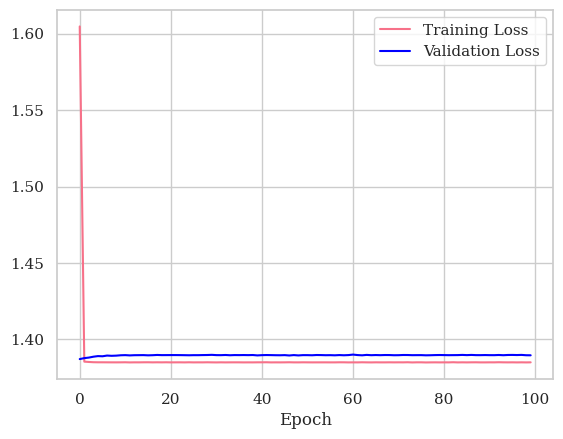

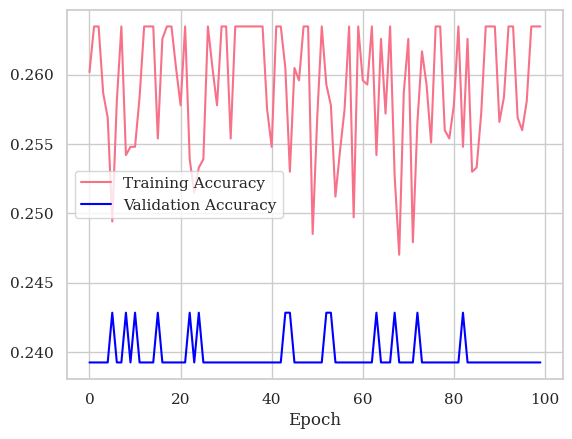

In [22]:
mlp_graph = build_mlp_classifier(10, lr=0.001)
mlp_graph, mlp_graph_results = CV_train(mlp_graph, X_GRAPH, X_TEST_GRAPH, n_epochs=100)

Epoch 1/50


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


105/105 [==============================] - 1s 6ms/step - loss: 2.7641 - accuracy: 0.2584 - val_loss: 2.6072 - val_accuracy: 0.2392
Epoch 2/50
105/105 [==============================] - 0s 5ms/step - loss: 2.4755 - accuracy: 0.2635 - val_loss: 2.3496 - val_accuracy: 0.2392
Epoch 3/50
105/105 [==============================] - 0s 5ms/step - loss: 2.2434 - accuracy: 0.2635 - val_loss: 2.1424 - val_accuracy: 0.2392
Epoch 4/50
105/105 [==============================] - 0s 4ms/step - loss: 2.0569 - accuracy: 0.2635 - val_loss: 1.9760 - val_accuracy: 0.2392
Epoch 5/50
105/105 [==============================] - 0s 5ms/step - loss: 1.9073 - accuracy: 0.2563 - val_loss: 1.8429 - val_accuracy: 0.2392
Epoch 6/50
105/105 [==============================] - 0s 4ms/step - loss: 1.7879 - accuracy: 0.2560 - val_loss: 1.7370 - val_accuracy: 0.2392
Epoch 7/50
105/105 [==============================] - 0s 4ms/step - loss: 1.6931 - accuracy: 0.2554 - val_loss: 1.6532 - val_accuracy: 0.2392
Epoch 8/50
105/10

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


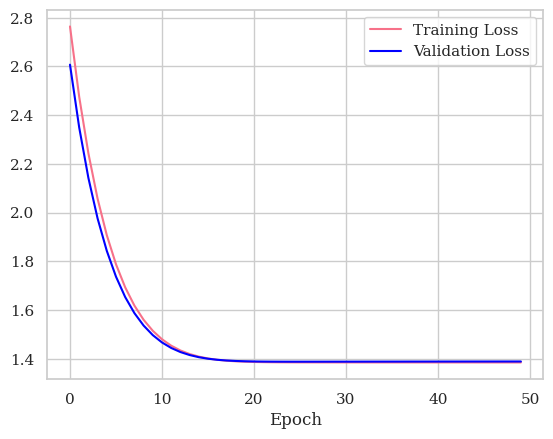

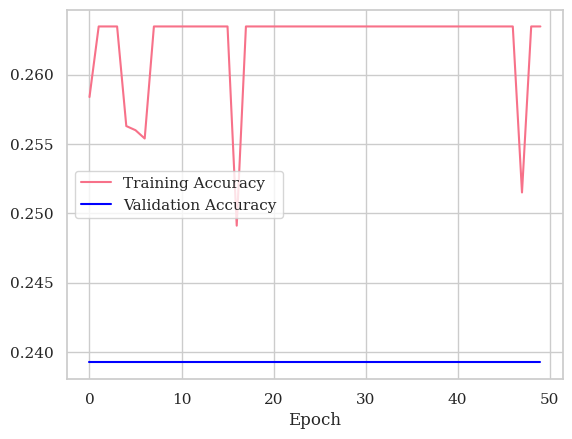

In [23]:
cnn_graph = build_cnn_classifier((64, 1), 2, lr = 0.0001)
cnn_graph, cnn_graph_results = CV_train(cnn_graph, X_GRAPH, X_TEST_GRAPH, cnn = True)

## Models on Avg data

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 1.6963 - accuracy: 0.2554
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3855 - accuracy: 0.2584
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3857 - accuracy: 0.2671
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2605
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3856 - accuracy: 0.2620
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2630
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2620
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2584
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3855 - accuracy: 0.2472
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3853 - accuracy: 0.2589
Epoch 11/50
62/62 [

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2656
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3851 - accuracy: 0.2686
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3855 - accuracy: 0.2686
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3853 - accuracy: 0.2686
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3852 - accuracy: 0.2686
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3851 - accuracy: 0.2686
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3853 - accuracy: 0.2686
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3850 - accuracy: 0.2686
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3851 - accuracy: 0.2686
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2681
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 3ms/step - loss: 1.3863 - accuracy: 0.2543
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 1.3860 - accuracy: 0.2549
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3860 - accuracy: 0.2549
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3858 - accuracy: 0.2686
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3856 - accuracy: 0.2686
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3858 - accuracy: 0.2686
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3858 - accuracy: 0.2686
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3857 - accuracy: 0.2686
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3859 - accuracy: 0.2686
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3859 - accuracy: 0.2686
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 0s 3ms/step - loss: 1.3851 - accuracy: 0.2676
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 1.3849 - accuracy: 0.2676
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3848 - accuracy: 0.2676
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3850 - accuracy: 0.2676
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3848 - accuracy: 0.2676
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3849 - accuracy: 0.2676
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3845 - accuracy: 0.2676
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3846 - accuracy: 0.2676
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3847 - accuracy: 0.2676
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 1.3847 - accuracy: 0.2630
Epoch 11/50
62/62 [===========

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyError: 'val_loss'

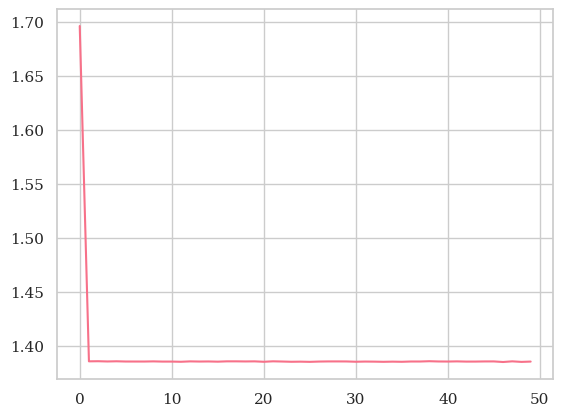

In [26]:
mlp_avg = build_mlp_classifier(num_layers)
mlp_avg, mlp_avg_results = CV_train(mlp_avg, X_AVG, X_TEST_AVG)

Epoch 1/50
62/62 [==============================] - 3s 32ms/step - loss: 1.6140 - accuracy: 0.2559
Epoch 2/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3869 - accuracy: 0.2528
Epoch 3/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3865 - accuracy: 0.2661
Epoch 4/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3866 - accuracy: 0.2538
Epoch 5/50
62/62 [==============================] - 2s 33ms/step - loss: 1.3868 - accuracy: 0.2671
Epoch 6/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3872 - accuracy: 0.2538
Epoch 7/50
62/62 [==============================] - 2s 28ms/step - loss: 1.3866 - accuracy: 0.2656
Epoch 8/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3862 - accuracy: 0.2605
Epoch 9/50
62/62 [==============================] - 2s 29ms/step - loss: 1.3866 - accuracy: 0.2605
Epoch 10/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3861 - accuracy: 0.2549
Epoch 11/

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 2s 30ms/step - loss: 1.3867 - accuracy: 0.2702
Epoch 2/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3870 - accuracy: 0.2681
Epoch 3/50
62/62 [==============================] - 2s 34ms/step - loss: 1.3864 - accuracy: 0.2707
Epoch 4/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3863 - accuracy: 0.2528
Epoch 5/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3869 - accuracy: 0.2594
Epoch 6/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3869 - accuracy: 0.2615
Epoch 7/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3863 - accuracy: 0.2753
Epoch 8/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3869 - accuracy: 0.2666
Epoch 9/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3869 - accuracy: 0.2676
Epoch 10/50
62/62 [==============================] - 2s 29ms/step - loss: 1.3861 - accuracy: 0.2666
Epoch 11/50
62/62 [=

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 2s 32ms/step - loss: 1.3875 - accuracy: 0.2462
Epoch 2/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3873 - accuracy: 0.2600
Epoch 3/50
62/62 [==============================] - 2s 33ms/step - loss: 1.3873 - accuracy: 0.2600
Epoch 4/50
62/62 [==============================] - 2s 30ms/step - loss: 1.3871 - accuracy: 0.2686
Epoch 5/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3870 - accuracy: 0.2686
Epoch 6/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3871 - accuracy: 0.2686
Epoch 7/50
62/62 [==============================] - 2s 34ms/step - loss: 1.3871 - accuracy: 0.2686
Epoch 8/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3870 - accuracy: 0.2686
Epoch 9/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3869 - accuracy: 0.2686
Epoch 10/50
62/62 [==============================] - 2s 31ms/step - loss: 1.3870 - accuracy: 0.2686
Epoch 11/50
62/62 [=

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62/62 [==============================] - 2s 32ms/step - loss: 1.3864 - accuracy: 0.2676
Epoch 2/50
62/62 [==============================] - 2s 33ms/step - loss: 1.3862 - accuracy: 0.2676
Epoch 3/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3861 - accuracy: 0.2676
Epoch 4/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3860 - accuracy: 0.2676
Epoch 5/50
62/62 [==============================] - 2s 34ms/step - loss: 1.3860 - accuracy: 0.2676
Epoch 6/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3860 - accuracy: 0.2676
Epoch 7/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3859 - accuracy: 0.2676
Epoch 8/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3859 - accuracy: 0.2676
Epoch 9/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3859 - accuracy: 0.2676
Epoch 10/50
62/62 [==============================] - 2s 32ms/step - loss: 1.3859 - accuracy: 0.2610
Epoch 11/50
62/62 [=

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


81/81 [==============================] - 1s 9ms/step


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


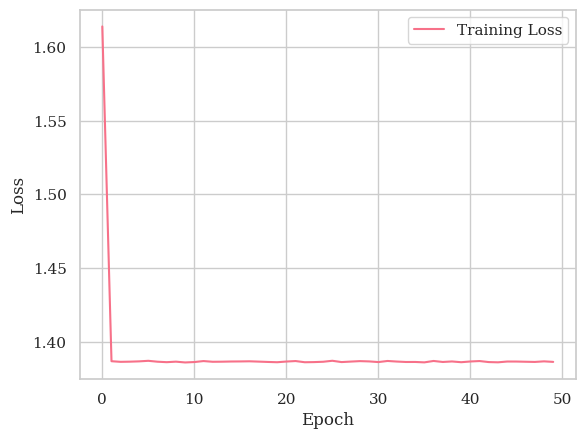

In [29]:
cnn_avg = build_cnn_classifier(input_shape = (751, 1), num_layers = num_layers)
cnn_avg, cnn_avg_results = CV_train(cnn_avg, X_AVG, X_TEST_AVG, cnn=True)

## Models on CSP data

In [29]:
## LR scheduler, early stopping?, model saving, take best val f1 score

Epoch 1/100


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


105/105 [==============================] - 1s 4ms/step - loss: 1.4576 - accuracy: 0.3317 - val_loss: 1.3601 - val_accuracy: 0.3218
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 1.3378 - accuracy: 0.3856 - val_loss: 1.3147 - val_accuracy: 0.3959
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 1.2961 - accuracy: 0.4464 - val_loss: 1.3136 - val_accuracy: 0.4474
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 1.2613 - accuracy: 0.4952 - val_loss: 1.2529 - val_accuracy: 0.5012
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 1.2259 - accuracy: 0.4964 - val_loss: 1.2648 - val_accuracy: 0.4892
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 1.2165 - accuracy: 0.5102 - val_loss: 1.2003 - val_accuracy: 0.5407
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 1.1871 - accuracy: 0.5326 - val_loss: 1.2129 - val_accuracy: 0.5167
Epoch 8/100

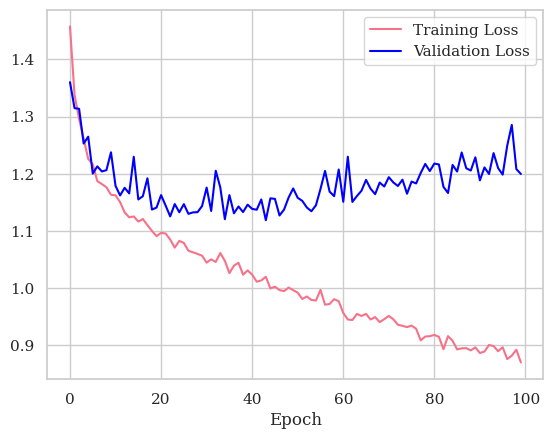

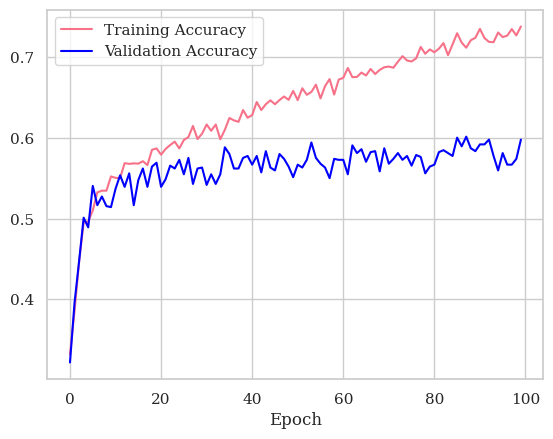

In [53]:
mlp_csp = build_mlp_classifier(lr = 0.001)
mlp_csp, mlp_csp_results = CV_train(mlp_csp, X_CSP, X_TEST_CSP, n_epochs = 100)

In [55]:
mlp_csp.save('models/mlp_csp.h5')

In [31]:
mlp_csp = keras.models.load_model('models/mlp_csp.h5')

In [32]:
pred = mlp_csp.predict(X_TEST_CSP)
print("Accuracy score: ", accuracy_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1)))
print("F1 score: ", f1_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1), average='weighted'))

27/27 [==============================] - 0s 798us/step
Accuracy score:  0.5636574074074074
F1 score:  0.5621062854722685


In [33]:
pred = mlp_csp.predict(X_TEST_CSP_NOISE)
print("Accuracy score: ", accuracy_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1)))
print("F1 score: ", f1_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1), average='weighted'))

27/27 [==============================] - 0s 950us/step
Accuracy score:  0.3298611111111111
F1 score:  0.22875849632403936


In [34]:
pred = mlp_csp.predict(X_TEST_CSP_NOISE_2)
print("Accuracy score: ", accuracy_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1)))
print("F1 score: ", f1_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1), average='weighted'))

 1/27 [>.............................] - ETA: 0s

27/27 [==============================] - 0s 837us/step
Accuracy score:  0.25462962962962965
F1 score:  0.10973328481283894


Epoch 1/120


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


105/105 [==============================] - 1s 5ms/step - loss: 2.3407 - accuracy: 0.3605 - val_loss: 1.6627 - val_accuracy: 0.3756
Epoch 2/120
105/105 [==============================] - 0s 3ms/step - loss: 1.5067 - accuracy: 0.4057 - val_loss: 1.3928 - val_accuracy: 0.4306
Epoch 3/120
105/105 [==============================] - 0s 3ms/step - loss: 1.3543 - accuracy: 0.4434 - val_loss: 1.3225 - val_accuracy: 0.4701
Epoch 4/120
105/105 [==============================] - 0s 3ms/step - loss: 1.3098 - accuracy: 0.4461 - val_loss: 1.2968 - val_accuracy: 0.4641
Epoch 5/120
105/105 [==============================] - 0s 3ms/step - loss: 1.2876 - accuracy: 0.4506 - val_loss: 1.2559 - val_accuracy: 0.4904
Epoch 6/120
105/105 [==============================] - 0s 3ms/step - loss: 1.2589 - accuracy: 0.4832 - val_loss: 1.2482 - val_accuracy: 0.4940
Epoch 7/120
105/105 [==============================] - 0s 3ms/step - loss: 1.2327 - accuracy: 0.5003 - val_loss: 1.3085 - val_accuracy: 0.4426
Epoch 8/120

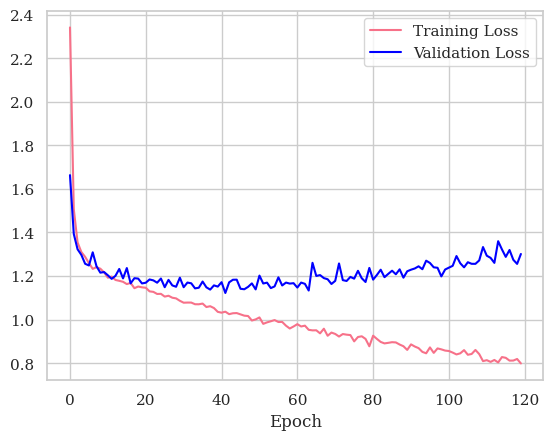

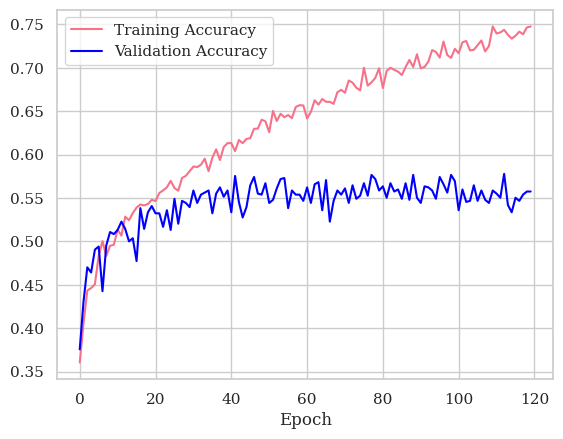

In [67]:
cnn_csp = build_cnn_classifier(input_shape = (64, 1), num_layers = 0, lr = 0.001)
cnn_csp, cnn_csp_results = CV_train(cnn_csp, X_CSP, X_TEST_CSP, cnn=True, n_epochs=120)

In [69]:
cnn_csp.save('models/cnn_csp.h5')

In [35]:
cnn_csp = keras.models.load_model('models/cnn_csp.h5')

In [36]:
pred = cnn_csp.predict(X_TEST_CSP)
print("Accuracy score: ", accuracy_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1)))
print("F1 score: ", f1_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1), average='weighted'))

27/27 [==============================] - 0s 2ms/step
Accuracy score:  0.5208333333333334
F1 score:  0.5201980525266411


In [37]:
pred = cnn_csp.predict(X_TEST_CSP_NOISE)
print("Accuracy score: ", accuracy_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1)))
print("F1 score: ", f1_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1), average='weighted'))

 1/27 [>.............................] - ETA: 0s

27/27 [==============================] - 0s 1ms/step
Accuracy score:  0.28587962962962965
F1 score:  0.22157248925440548


In [38]:
pred = cnn_csp.predict(X_TEST_CSP_NOISE_2)
print("Accuracy score: ", accuracy_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1)))
print("F1 score: ", f1_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1), average='weighted'))

27/27 [==============================] - 0s 1ms/step
Accuracy score:  0.2337962962962963
F1 score:  0.1049154334038055


In [73]:
def build_convlstm_classifier(input_shape, num_layers=1, lr=0.001):
    classifier = Sequential()
    
    # First ConvLSTM1D Layer
    classifier.add(Reshape((-1, 64, 1), input_shape=input_shape)) ## TODO: generalize reshape
    # classifier.add(ConvLSTM2D(32, kernel_size=(3, 1), activation='relu', input_shape=(None, 64)))
    
    # Intermediate ConvLSTM1D Layers
    for _ in range(num_layers):
        classifier.add(ConvLSTM1D(64, kernel_size=3, activation='relu'))
    
    # Flattening Layer
    classifier.add(Flatten())
    
    # Fully Connected Layers
    classifier.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    classifier.add(Dropout(0.5))
    
    # Output Layer
    classifier.add(Dense(units=4, activation='softmax'))

    # Compiling the model
    classifier.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

Epoch 1/120


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


105/105 [==============================] - 5s 18ms/step - loss: 1.6774 - accuracy: 0.3174 - val_loss: 1.3982 - val_accuracy: 0.2895
Epoch 2/120
105/105 [==============================] - 2s 14ms/step - loss: 1.3811 - accuracy: 0.3599 - val_loss: 1.3809 - val_accuracy: 0.3624
Epoch 3/120
105/105 [==============================] - 1s 14ms/step - loss: 1.3706 - accuracy: 0.3814 - val_loss: 1.3369 - val_accuracy: 0.4629
Epoch 4/120
105/105 [==============================] - 2s 15ms/step - loss: 1.3542 - accuracy: 0.4060 - val_loss: 1.3159 - val_accuracy: 0.4725
Epoch 5/120
105/105 [==============================] - 2s 14ms/step - loss: 1.3316 - accuracy: 0.4234 - val_loss: 1.3155 - val_accuracy: 0.4294
Epoch 6/120
105/105 [==============================] - 2s 15ms/step - loss: 1.3144 - accuracy: 0.4431 - val_loss: 1.2816 - val_accuracy: 0.4880
Epoch 7/120
105/105 [==============================] - 2s 15ms/step - loss: 1.2989 - accuracy: 0.4497 - val_loss: 1.2707 - val_accuracy: 0.4892
Epoc

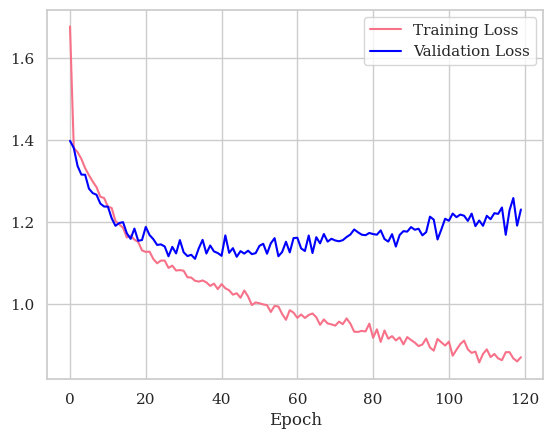

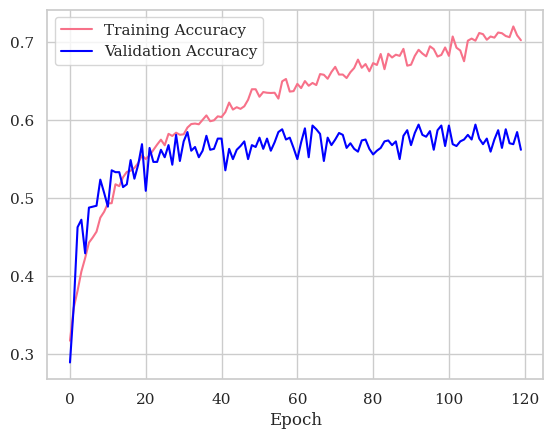

In [74]:
convlstm_csp = build_convlstm_classifier(input_shape = (64, 1, 1), num_layers = 1)
convlstm_csp, convlstm_csp_results = CV_train(convlstm_csp, X_CSP, X_TEST_CSP, convlstm = True, n_epochs=120)

In [75]:
convlstm_csp.save('models/convlstm_csp.h5')

In [39]:
convlstm_csp = keras.models.load_model('models/convlstm_csp.h5')

In [40]:
pred = convlstm_csp.predict(X_TEST_CSP)
print("Accuracy score: ", accuracy_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1)))
print("F1 score: ", f1_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1), average='weighted'))

27/27 [==============================] - 0s 3ms/step
Accuracy score:  0.5868055555555556
F1 score:  0.586418714222916


In [41]:
pred = convlstm_csp.predict(X_TEST_CSP_NOISE)
print("Accuracy score: ", accuracy_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1)))
print("F1 score: ", f1_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1), average='weighted'))

15/27 [===============>..............] - ETA: 0s

27/27 [==============================] - 0s 5ms/step
Accuracy score:  0.3460648148148148
F1 score:  0.2557664909230265


In [42]:
pred = convlstm_csp.predict(X_TEST_CSP_NOISE_2)
print("Accuracy score: ", accuracy_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1)))
print("F1 score: ", f1_score(np.argmax(y_out_test, 1), np.argmax(pred, axis=1), average='weighted'))

 1/27 [>.............................] - ETA: 0s

27/27 [==============================] - 0s 4ms/step
Accuracy score:  0.2650462962962963
F1 score:  0.16535739628181848


## Models on raw data

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
105/105 [==============================] - 4s 29ms/step - loss: 40.7305 - accuracy: 0.2560 - val_loss: 28.9615 - val_accuracy: 0.2392
Epoch 2/150
105/105 [==============================] - 3s 27ms/step - loss: 21.4000 - accuracy: 0.2635 - val_loss: 15.0831 - val_accuracy: 0.2392
Epoch 3/150
105/105 [==============================] - 3s 27ms/step - loss: 11.1103 - accuracy: 0.2635 - val_loss: 7.8388 - val_accuracy: 0.2392
Epoch 4/150
105/105 [==============================] - 3s 27ms/step - loss: 5.8493 - accuracy: 0.2638 - val_loss: 4.2426 - val_accuracy: 0.2392
Epoch 5/150
105/105 [==============================] - 3s 27ms/step - loss: 3.3051 - accuracy: 0.2638 - val_loss: 2.5657 - val_accuracy: 0.2392
Epoch 6/150
105/105 [==============================] - 3s 27ms/step - loss: 2.1537 - accuracy: 0.2647 - val_loss: 1.8378 - val_accuracy: 0.2392
Epoch 7/150
105/105 [==============================] - 3s 27ms/step - loss: 1.6700 - accuracy: 0.2629 - val_loss: 1.5459 - val_accu

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


27/27 [==============================] - 0s 6ms/step


c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


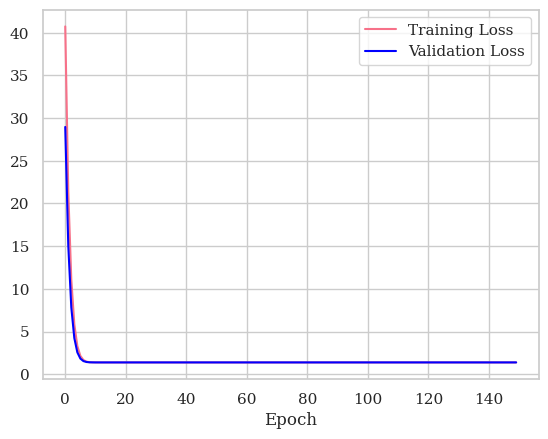

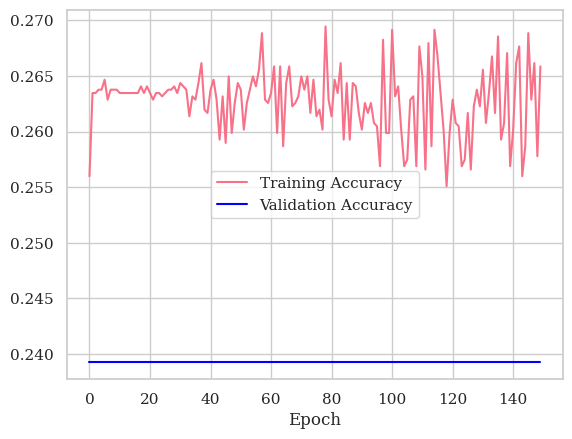

In [41]:
mlp = build_mlp_classifier(2, 0.0001)
mlp, mlp_results = CV_train(mlp, X, X_TEST, n_epochs=150)

In [21]:
mlp.predict(X_TEST)

36/36 [==============================] - 0s 4ms/step


array([[0.2591578 , 0.26177537, 0.23849146, 0.24057533],
       [0.2591578 , 0.26177537, 0.23849146, 0.24057533],
       [0.2591578 , 0.26177537, 0.23849146, 0.24057533],
       ...,
       [0.2591578 , 0.26177537, 0.23849146, 0.24057533],
       [0.2591578 , 0.26177537, 0.23849146, 0.24057533],
       [0.2591578 , 0.26177537, 0.23849146, 0.24057533]], dtype=float32)

In [45]:
cnn = build_cnn2d_classifier(input_shape = (22, 1126, 1), num_layers = 1)
cnn, cnn_results = CV_train(cnn, X, X_TEST, n_epochs=15)

Epoch 1/15
105/105 [==============================] - 102s 960ms/step - loss: 1.4487 - accuracy: 0.2569 - val_loss: 1.3963 - val_accuracy: 0.2392
Epoch 2/15
105/105 [==============================] - 103s 983ms/step - loss: 1.3940 - accuracy: 0.2602 - val_loss: 1.3962 - val_accuracy: 0.2392
Epoch 3/15
105/105 [==============================] - 103s 980ms/step - loss: 1.3937 - accuracy: 0.2536 - val_loss: 1.3970 - val_accuracy: 0.2392
Epoch 4/15
105/105 [==============================] - 109s 1s/step - loss: 1.3935 - accuracy: 0.2653 - val_loss: 1.3974 - val_accuracy: 0.2428
Epoch 5/15
 56/105 [===============>..............] - ETA: 47s - loss: 1.3933 - accuracy: 0.2712

KeyboardInterrupt: 

In [29]:
# convlstm = build_convlstm_classifier(input_shape = (22, 751, 1), num_layers = 1)
# convlstm, convlstm_results = CV_train(convlstm, X, X_TEST, cnn = True)

In [46]:
def build_eegnet_classifier(lr = 0.01, nb_classes=4, Chans=22, Samples=751,
           dropoutRate=0.5, kernLength=64, F1=8,
           D=2, F2=16, norm_rate=0.25, dropoutType='Dropout', cpu=True):
    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')

    if cpu:
        input_shape = (Samples, Chans, 1)
        conv_filters = (kernLength, 1)
        depth_filters = (1, Chans)
        pool_size = (6, 1)
        pool_size2 = (12, 1)
        separable_filters = (20, 1)
        axis = -1
    else:
        input_shape = (1, Chans, Samples)
        input_shape = (Chans, Samples, 1)
        conv_filters = (1, kernLength)
        depth_filters = (Chans, 1)
        pool_size = (1, 6)
        pool_size2 = (1, 12)
        separable_filters = (1, 20)
        axis = 1

    input1 = Input(shape=input_shape)
    block1 = Conv2D(F1, conv_filters, padding='same',
                    input_shape=input_shape,
                    use_bias=False)(input1)
    block1 = BatchNormalization(axis=axis)(block1)
    block1 = DepthwiseConv2D(depth_filters, use_bias=False,
                             depth_multiplier=D,
                             depthwise_constraint=max_norm(1.))(block1)
    block1 = BatchNormalization(axis=axis)(block1)
    block1 = Activation('elu')(block1)
    block1 = AveragePooling2D(pool_size)(block1)
    block1 = dropoutType(dropoutRate)(block1)

    block2 = SeparableConv2D(F2, separable_filters,
                             use_bias=False, padding='same')(block1)
    block2 = BatchNormalization(axis=axis)(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D(pool_size2)(block2)
    block2 = dropoutType(dropoutRate)(block2)

    flatten = Flatten(name='flatten')(block2)

    dense = Dense(nb_classes, name='dense',
                  kernel_constraint=max_norm(norm_rate))(flatten)
    softmax = Activation('softmax', name='softmax')(dense)
    classifier = Model(inputs=input1, outputs=softmax)
    classifier.compile(optimizer=keras.optimizers.Adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier

In [47]:
X_t = np.transpose(X, (0, 2, 1, 3))
X_TEST_t = np.transpose(X_TEST, (0, 2, 1, 3))

In [48]:
eegnet = build_eegnet_classifier()
eegnet, eegnet_results = CV_train(eegnet, X_t, X_TEST_t, n_epochs=20)

c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20


ValueError: in user code:

    File "c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Sam\miniconda3\envs\pytgpu\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 751, 22, 1), found shape=(None, 1126, 22, 1)


In [50]:

def build_shallow_conv_net(nb_classes=4, Chans=22, Samples=751, dropoutRate=0.5, cpu=True):
    if cpu:
        input_shape = (Samples, Chans, 1)
        conv_filters = (25, 1)
        conv_filters2 = (1, Chans)
        pool_size = (45, 1)
        strides = (15, 1)
        axis = -1
    else:
        input_shape = (1, Chans, Samples)
        conv_filters = (1, 20)
        conv_filters2 = (Chans, 1)
        pool_size = (1, 45)
        strides = (1, 15)
        axis = 1

    input_main = Input(input_shape)
    block1 = Conv2D(20, conv_filters,
                    input_shape=input_shape,
                    kernel_constraint=max_norm(2., axis=(0, 1, 2)))(input_main)
    block1 = Conv2D(20, conv_filters2, use_bias=False,
                    kernel_constraint=max_norm(2., axis=(0, 1, 2)))(block1)
    block1 = BatchNormalization(axis=axis, epsilon=1e-05, momentum=0.1)(block1)
    block1 = Activation(square)(block1)
    block1 = AveragePooling2D(pool_size=pool_size, strides=strides)(block1)
    block1 = Activation(log)(block1)
    block1 = Dropout(dropoutRate)(block1)
    flatten = Flatten()(block1)
    dense = Dense(nb_classes, kernel_constraint=max_norm(0.5))(flatten)
    softmax = Activation('softmax')(dense)

    return Model(inputs=input_main, outputs=softmax)


In [52]:
shallow_conv_net = build_shallow_conv_net()
shallow_conv_net.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
shallow_conv_net, Shallow_conv_net_results = CV_train(shallow_conv_net, X_t, X_TEST_t)

Epoch 1/50
98/98 [==============================] - 9s 87ms/step - loss: 5.0228 - accuracy: 0.2556 - val_loss: 1.6982 - val_accuracy: 0.2442
Epoch 2/50
98/98 [==============================] - 7s 71ms/step - loss: 3.2214 - accuracy: 0.2614 - val_loss: 1.6130 - val_accuracy: 0.2545
Epoch 3/50
98/98 [==============================] - 7s 69ms/step - loss: 2.5016 - accuracy: 0.2569 - val_loss: 1.5401 - val_accuracy: 0.2558
Epoch 4/50
98/98 [==============================] - 7s 67ms/step - loss: 2.1170 - accuracy: 0.2350 - val_loss: 1.6308 - val_accuracy: 0.2558
Epoch 5/50
98/98 [==============================] - 7s 67ms/step - loss: 2.1213 - accuracy: 0.2524 - val_loss: 2.0699 - val_accuracy: 0.2442
Epoch 6/50
98/98 [==============================] - 6s 65ms/step - loss: 1.9483 - accuracy: 0.2460 - val_loss: 1.9415 - val_accuracy: 0.2442
Epoch 7/50
98/98 [==============================] - 7s 68ms/step - loss: 1.7978 - accuracy: 0.2486 - val_loss: 1.7945 - val_accuracy: 0.2442
Epoch 8/50
98

KeyboardInterrupt: 

In [ ]:
deep_conv_net = build_deep_conv_net()
deep_conv_net.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
deep_conv_net, deep_conv_net_results = CV_train(deep_conv_net, X, X_TEST)

In [102]:
X.shape

(2448, 22, 751, 1)

In [105]:
X.transpose(0,2,1, 3).shape

(2448, 751, 22, 1)

In [ ]:
eegnet_fusion = build_eegnet_fusion()
# eegnet_fusion, eegnet_fusion_results = CV_train(eegnet_fusion, X.transpose(0,2,1, 3), X_TEST.transpose(0,2,1, 3))
eegnet_fusion, eegnet_fusion_results = CV_train(eegnet_fusion, X, X_TEST)

## Results

In [31]:
print_results(mlp_csp_results)

      Accuracy        F1  Precision    Recall
Fold                                         
F1    0.563265  0.561764   0.566665  0.563265
F2    0.567347  0.559894   0.582652  0.567347
F3    0.548980  0.549042   0.553798  0.548980
F4    0.573469  0.570538   0.574940  0.573469
Test  0.478781  0.479830   0.483203  0.478781
Avg   0.546368  0.544213   0.552252  0.546368
Best  0.573469  0.570538   0.574940  0.573469


In [32]:
print_results(cnn_csp_results)

      Accuracy        F1  Precision    Recall
Fold                                         
F1    0.524490  0.524033   0.524272  0.524490
F2    0.710204  0.708533   0.712515  0.710204
F3    0.789796  0.790282   0.791901  0.789796
F4    0.824490  0.823130   0.830997  0.824490
Test  0.399306  0.390788   0.406285  0.399306
Avg   0.649657  0.647353   0.653194  0.649657
Best  0.824490  0.823130   0.830997  0.824490


In [33]:
print_results(convlstm_csp_results)

      Accuracy        F1  Precision    Recall
Fold                                         
F1    0.571429  0.566577   0.589510  0.571429
F2    0.593878  0.589788   0.599532  0.593878
F3    0.638776  0.639659   0.642939  0.638776
F4    0.606122  0.606806   0.622782  0.606122
Test  0.482253  0.476469   0.513347  0.482253
Avg   0.578491  0.575860   0.593622  0.578491
Best  0.638776  0.639659   0.642939  0.638776


In [35]:
print_results(mlp_results)

      Accuracy        F1  Precision    Recall
Fold                                         
F1    0.267347  0.112794   0.071474  0.267347
F2    0.248980  0.099266   0.061991  0.248980
F3    0.248980  0.099266   0.061991  0.248980
F4    0.253061  0.102214   0.064040  0.253061
Test  0.250000  0.100000   0.062500  0.250000
Avg   0.253673  0.102708   0.064399  0.253673
Best  0.267347  0.112794   0.071474  0.267347


In [37]:
print_results(eegnet_results)

      Accuracy        F1  Precision    Recall
Fold                                         
F1    0.332653  0.249989   0.593530  0.332653
F2    0.242857  0.095222   0.059221  0.242857
F3    0.214286  0.075630   0.045918  0.214286
F4    0.424490  0.382104   0.521721  0.424490
Test  0.429012  0.389879   0.524608  0.429012
Avg   0.328660  0.238565   0.349000  0.328660
Best  0.429012  0.389879   0.524608  0.429012


# Robustness Testing

In [ ]:
# hyperparameter fixing
# train test subject split
# eegnet performance


# augmentation with noise, 
# braindecode direct model inference
# other repos, original paper references
# triplet loss, check list
# filter for preprocessing


# save and load models

In [72]:
def test_model(model, X_test, y_out):
    results = {}
    test_pred = model.predict(X_test)
    pred = (test_pred == test_pred.max(axis=1)[:,None]).astype(int)
    results['Accuracy'] = (accuracy_score(y_out.argmax(axis=1), pred.argmax(axis=1)))
    results['F1'] = (f1_score(y_out.argmax(axis=1), pred.argmax(axis=1), average='weighted'))
    results['Precision'] = (precision_score(y_out.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    results['Recall'] = (recall_score(y_out.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    
    return results


In [80]:
mlp_csp_noise_results = test_model(mlp_csp, X_TEST_CSP_NOISE, y_out_test)
mlp_csp_noise_results

 1/81 [..............................] - ETA: 1s

81/81 [==============================] - 0s 1ms/step


{'Accuracy': 0.3325617283950617,
 'F1': 0.32777395064472664,
 'Precision': 0.3480409529645988,
 'Recall': 0.3325617283950617}

In [87]:
cnn_csp_noise_results = test_model(cnn_csp, np.expand_dims(X_TEST_CSP_NOISE,-1), y_out_test)
cnn_csp_noise_results

81/81 [==============================] - 0s 3ms/step


{'Accuracy': 0.3128858024691358,
 'F1': 0.3126345524224593,
 'Precision': 0.3130086762674775,
 'Recall': 0.3128858024691358}

In [88]:
convlstm_csp_noise_results = test_model(convlstm_csp, np.expand_dims(np.expand_dims(X_TEST_CSP_NOISE,-1), -1), y_out_test)
convlstm_csp_noise_results

81/81 [==============================] - 1s 4ms/step


{'Accuracy': 0.3167438271604938,
 'F1': 0.30464761778791205,
 'Precision': 0.3108202506317597,
 'Recall': 0.3167438271604938}

In [99]:
mlp_csp_noise_results = test_model(mlp_csp, X_TEST_CSP_NOISE_8, y_out_test)
mlp_csp_noise_results

 1/81 [..............................] - ETA: 1s

81/81 [==============================] - 0s 1ms/step


{'Accuracy': 0.3487654320987654,
 'F1': 0.3461475539096492,
 'Precision': 0.35444081711698616,
 'Recall': 0.3487654320987654}

In [100]:
cnn_csp_noise_results = test_model(cnn_csp, np.expand_dims(X_TEST_CSP_NOISE_8,-1), y_out_test)
cnn_csp_noise_results

 1/81 [..............................] - ETA: 1s

81/81 [==============================] - 0s 2ms/step


{'Accuracy': 0.29398148148148145,
 'F1': 0.29412195709082073,
 'Precision': 0.29514185404194687,
 'Recall': 0.29398148148148145}

In [101]:
convlstm_csp_noise_results = test_model(convlstm_csp, np.expand_dims(np.expand_dims(X_TEST_CSP_NOISE_8,-1), -1), y_out_test)
convlstm_csp_noise_results

13/81 [===>..........................] - ETA: 0s

81/81 [==============================] - 0s 4ms/step


{'Accuracy': 0.35300925925925924,
 'F1': 0.3421809001857017,
 'Precision': 0.35263920720802205,
 'Recall': 0.35300925925925924}